In [2]:
# Download data
# import download_data

In [3]:
# Load in data
import numpy as np
train_X = np.load("kmnist-train-imgs.npz")['arr_0']
train_y = np.load("kmnist-train-labels.npz")['arr_0']
test_X = np.load("kmnist-test-imgs.npz")['arr_0']
test_y = np.load("kmnist-test-labels.npz")['arr_0']

In [4]:
# Check shape of data
np.shape(train_X), np.shape(train_y), np.shape(test_X), np.shape(test_y)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

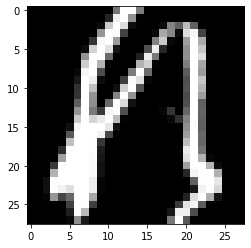

In [5]:
# View 1 of the characters
from matplotlib import pyplot as plt
img1 = train_X[0]
plt.imshow(img1, cmap = plt.get_cmap('gray'))

In [6]:
# Normalize pixel values
train_X = train_X / 255.0
test_X = test_X / 255.0

In [7]:
# Reshape Datasets
train_X = train_X.reshape(train_X.shape[0], 28, 28, 1)
test_X = test_X.reshape(test_X.shape[0], 28, 28, 1)

In [8]:
# Import neural network libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [9]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [10]:
from tensorflow.keras.optimizers import SGD

In [11]:
from tensorflow.keras.layers import BatchNormalization

In [12]:
from tensorflow.keras import regularizers

In [13]:
# # Base Model

# # 2x32 layer convolutional neural network
# model = Sequential()

# layers = 3

# model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# for i in range (layers - 1):
#     model.add(Conv2D(32, (3, 3)))
#     model.add(Activation("relu"))
#     model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Flatten())
# model.add(Dense(32))

# model.add(Dense(10))
# model.add(Activation('softmax'))



In [14]:
# M6-2 Model

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(1024, kernel_regularizer=regularizers.l1(0.01)))
model.add(Activation("relu"))

model.add(Dense(10, kernel_regularizer=regularizers.l1(0.01)))
model.add(Activation('softmax'))

KeyboardInterrupt: 

In [ ]:
BATCH_SIZE = 16
EPOCHS = 3
VAL_SPLIT = 0.1

In [ ]:

# opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VAL_SPLIT)

Epoch 1/3
3375/3375 [==============================] - 73s 22ms/step - loss: 2.9956 - accuracy: 0.9003 - val_loss: 1.1895 - val_accuracy: 0.9393
Epoch 2/3
3375/3375 [==============================] - 71s 21ms/step - loss: 1.0933 - accuracy: 0.9586 - val_loss: 1.0697 - val_accuracy: 0.9510
Epoch 3/3
3375/3375 [==============================] - 71s 21ms/step - loss: 0.9855 - accuracy: 0.9694 - val_loss: 0.9571 - val_accuracy: 0.9660


In [ ]:
# Accuracy on test set
model.evaluate(test_X, test_y, verbose = 0)[1]

0.9136999845504761

In [ ]:
# regularizer in conv layers

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), kernel_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), kernel_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

BATCH_SIZE = 16
EPOCHS = 3
VAL_SPLIT = 0.1

# opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VAL_SPLIT)

# Accuracy on test set
model.evaluate(test_X, test_y, verbose = 0)[1]

Epoch 1/3
3375/3375 [==============================] - 75s 22ms/step - loss: 4.1552 - accuracy: 0.8155 - val_loss: 2.4434 - val_accuracy: 0.7995
Epoch 2/3
3375/3375 [==============================] - 68s 20ms/step - loss: 1.9719 - accuracy: 0.8899 - val_loss: 1.9097 - val_accuracy: 0.8798
Epoch 3/3
3375/3375 [==============================] - 68s 20ms/step - loss: 1.7677 - accuracy: 0.9088 - val_loss: 1.9682 - val_accuracy: 0.8190


0.7146999835968018

In [15]:
# regularizer in conv layers

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

BATCH_SIZE = 16
EPOCHS = 10
VAL_SPLIT = 0.1

# opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VAL_SPLIT)

# Accuracy on test set
model.evaluate(test_X, test_y, verbose = 0)[1]

Epoch 1/10
3375/3375 [==============================] - 70s 20ms/step - loss: 0.2661 - accuracy: 0.9153 - val_loss: 0.1635 - val_accuracy: 0.9503
Epoch 2/10
3375/3375 [==============================] - 70s 21ms/step - loss: 0.1150 - accuracy: 0.9639 - val_loss: 0.2114 - val_accuracy: 0.9402
Epoch 3/10
3375/3375 [==============================] - 69s 21ms/step - loss: 0.0766 - accuracy: 0.9757 - val_loss: 0.1077 - val_accuracy: 0.9715
Epoch 4/10
3375/3375 [==============================] - 69s 20ms/step - loss: 0.0549 - accuracy: 0.9831 - val_loss: 0.1180 - val_accuracy: 0.9678
Epoch 5/10
3375/3375 [==============================] - 70s 21ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0876 - val_accuracy: 0.9792
Epoch 6/10
3375/3375 [==============================] - 69s 20ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0951 - val_accuracy: 0.9787
Epoch 7/10
3375/3375 [==============================] - 71s 21ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.1362 -

0.9531000256538391

In [18]:
print(history.history)

{'loss': [0.26608556509017944, 0.11495079845190048, 0.07657629251480103, 0.05488773062825203, 0.04548388347029686, 0.03608114644885063, 0.02741876058280468, 0.026133619248867035, 0.024337681010365486, 0.021681630983948708], 'accuracy': [0.915314793586731, 0.9638518691062927, 0.9756666421890259, 0.983129620552063, 0.9858888983726501, 0.988703727722168, 0.9913148283958435, 0.9918518662452698, 0.9927592873573303, 0.993759274482727], 'val_loss': [0.1634930968284607, 0.2114003300666809, 0.10772743076086044, 0.11796694993972778, 0.08761326223611832, 0.09510474652051926, 0.13622955977916718, 0.09605921059846878, 0.09540624916553497, 0.0995713621377945], 'val_accuracy': [0.9503333568572998, 0.9401666522026062, 0.9714999794960022, 0.9678333401679993, 0.9791666865348816, 0.9786666631698608, 0.9726666808128357, 0.981166660785675, 0.9816666841506958, 0.9808333516120911]}


In [20]:
# regularizer in conv layers

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

BATCH_SIZE = 16
EPOCHS = 10
VAL_SPLIT = 0.1

# opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

history2 = model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VAL_SPLIT)

# Accuracy on test set
model.evaluate(test_X, test_y, verbose = 0)[1]

Epoch 1/10
3375/3375 [==============================] - 73s 21ms/step - loss: 0.5817 - accuracy: 0.9061 - val_loss: 0.5669 - val_accuracy: 0.9177
Epoch 2/10
3375/3375 [==============================] - 76s 22ms/step - loss: 0.4479 - accuracy: 0.9444 - val_loss: 0.4946 - val_accuracy: 0.9232
Epoch 3/10
3375/3375 [==============================] - 77s 23ms/step - loss: 0.3887 - accuracy: 0.9535 - val_loss: 0.4208 - val_accuracy: 0.9480
Epoch 4/10
3375/3375 [==============================] - 74s 22ms/step - loss: 0.3372 - accuracy: 0.9605 - val_loss: 0.3489 - val_accuracy: 0.9552
Epoch 5/10
3375/3375 [==============================] - 75s 22ms/step - loss: 0.3071 - accuracy: 0.9642 - val_loss: 0.3676 - val_accuracy: 0.9505
Epoch 6/10
3375/3375 [==============================] - 73s 22ms/step - loss: 0.2839 - accuracy: 0.9668 - val_loss: 0.3225 - val_accuracy: 0.9568
Epoch 7/10
3375/3375 [==============================] - 74s 22ms/step - loss: 0.2626 - accuracy: 0.9683 - val_loss: 0.2721 -

0.920799970626831

In [26]:
# regularizer in conv layers

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Conv2D(192, (3, 3), kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))

# model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

# BATCH_SIZE = 16
# EPOCHS = 10
# VAL_SPLIT = 0.1

# # opt = SGD(learning_rate=0.01, momentum=0.9)

# model.compile(loss="categorical_crossentropy",
#              optimizer='adam',
#              metrics=['accuracy'])

# history3 = model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VAL_SPLIT)

# # Accuracy on test set
# model.evaluate(test_X, test_y, verbose = 0)[1]

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_25 (Bat  (None, 26, 26, 64)       256       
 chNormalization)                                                
                                                                 
 activation_33 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 batch_normalization_26 (Bat  (None, 11, 11, 128)     

In [30]:
# regularizer in conv layers

model = Sequential()

lmbd = 0

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(192, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Conv2D(192, (3, 3), kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))

# model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

# model.summary()

BATCH_SIZE = 16
EPOCHS = 10
VAL_SPLIT = 0.1

# opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

history3 = model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VAL_SPLIT)

# Accuracy on test set
model.evaluate(test_X, test_y, verbose = 0)[1]

Epoch 1/10
3375/3375 [==============================] - 335s 99ms/step - loss: 0.2267 - accuracy: 0.9321 - val_loss: 0.0938 - val_accuracy: 0.9735
Epoch 2/10
3375/3375 [==============================] - 331s 98ms/step - loss: 0.0847 - accuracy: 0.9744 - val_loss: 0.0532 - val_accuracy: 0.9870
Epoch 3/10
3375/3375 [==============================] - 329s 98ms/step - loss: 0.0632 - accuracy: 0.9813 - val_loss: 0.0731 - val_accuracy: 0.9827
Epoch 4/10
3375/3375 [==============================] - 329s 98ms/step - loss: 0.0483 - accuracy: 0.9855 - val_loss: 0.0508 - val_accuracy: 0.9865
Epoch 5/10
3375/3375 [==============================] - 334s 99ms/step - loss: 0.0419 - accuracy: 0.9884 - val_loss: 0.0663 - val_accuracy: 0.9855
Epoch 6/10
3375/3375 [==============================] - 334s 99ms/step - loss: 0.0380 - accuracy: 0.9893 - val_loss: 0.0474 - val_accuracy: 0.9892
Epoch 7/10
3375/3375 [==============================] - 334s 99ms/step - loss: 0.0291 - accuracy: 0.9916 - val_loss: 0

0.9740999937057495

In [35]:
# regularizer in conv layers

model = Sequential()

lmbd = 0.0001

model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(192, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(Conv2D(192, (3, 3), kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))

# model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512, (3, 3), kernel_regularizer=regularizers.l2(lmbd)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

# model.summary()

BATCH_SIZE = 16
EPOCHS = 10
VAL_SPLIT = 0.1

# opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

history4 = []

for i in range(EPOCHS):
    print("epoch " + str(i + 1))

    history4.append( model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = 1, validation_split = VAL_SPLIT))
    model.evaluate(test_X, test_y, verbose = 0)

# Accuracy on test set
# model.evaluate(test_X, test_y, verbose = 0)

epoch 0
  78/3375 [..............................] - ETA: 5:27 - loss: 1.5041 - accuracy: 0.6314